In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from scipy import stats

In [2]:
df=pd.read_csv('Assignment_dataset/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.drop('country',axis=1,inplace=True)
#df=pd.get_dummies(df,columns=['Private'],drop_first=True)
scaler=StandardScaler()
x=scaler.fit_transform(df)
x

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

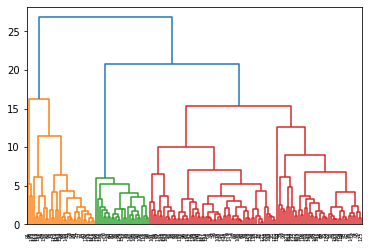

In [5]:
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


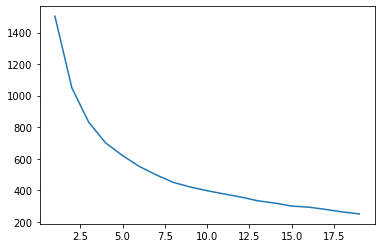

In [6]:
wcss=[]
for i in range(1,20):
    model=KMeans(n_clusters=i)
    clusters=model.fit_predict(x)
    wcss.append(model.inertia_)
    
plt.plot(range(1,20),wcss)

In [7]:
model=KMeans(n_clusters=3)
clusters=model.fit_predict(x)
df['Clusters']=clusters

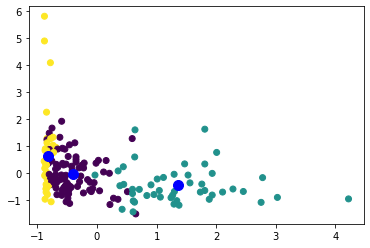

In [8]:
ceteroids=model.cluster_centers_
plt.scatter(x[:,0],x[:,1],c=clusters,cmap='viridis')
plt.scatter(ceteroids[:,0],ceteroids[:,1],s=100,c='blue')

In [9]:
df.groupby('Clusters').describe().transpose()

Clusters                     0             1              2
child_mort count     84.000000     47.000000      36.000000
           mean      21.927381     92.961702       5.000000
           std       13.757919     33.375229       2.188933
           min        4.500000     36.900000       2.600000
           25%       11.650000     63.800000       3.550000
...                        ...           ...            ...
gdpp       min      592.000000    231.000000   16600.000000
           25%     2967.500000    550.000000   30675.000000
           50%     4670.000000    897.000000   41200.000000
           75%     9070.000000   1470.000000   48475.000000
           max    28000.000000  17100.000000  105000.000000

[72 rows x 3 columns]

In [10]:
z=np.abs(stats.zscore(df))
df=df[(z < 3).all(axis=1)]

In [11]:
x=df[df.columns.difference(['Clusters'])]
y=df['Clusters']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

<AxesSubplot:xlabel='child_mort'>

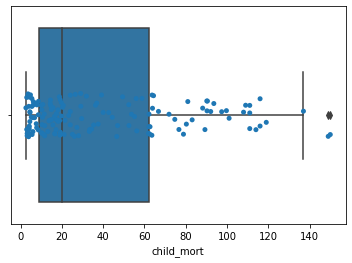

In [13]:
sns.boxplot(x='child_mort',data=df)
sns.stripplot(x='child_mort',data=df)

In [14]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'NB':GaussianNB(),
    'XGC':XGBClassifier(),
    'RF':RandomForestClassifier()
    
}

In [15]:
for name,model in  models.items():
    print(f'using {name}: ')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'Training Accuracy :{accuracy_score(y_train,model.predict(x_train))}')
    print(f'Testing Accuracy :{accuracy_score(y_test,y_pred)}')


using LR: 
Training Accuracy :0.9824561403508771
Testing Accuracy :0.9487179487179487
---------------------------------
using KNN: 
Training Accuracy :0.9736842105263158
Testing Accuracy :0.9230769230769231
---------------------------------
using DT: 
Training Accuracy :1.0
Testing Accuracy :0.8974358974358975
---------------------------------
using SVC: 
Training Accuracy :1.0
Testing Accuracy :0.9230769230769231
---------------------------------
using NB: 
Training Accuracy :0.9649122807017544
Testing Accuracy :0.8974358974358975
---------------------------------
using XGC: 


C:\Users\dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy :1.0
Testing Accuracy :0.9230769230769231
---------------------------------
using RF: 
Training Accuracy :1.0
Testing Accuracy :0.8717948717948718
---------------------------------
